https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203

## Transaction Table
* TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
* TransactionAMT: transaction payment amount in USD
* ProductCD: product code, the product for each transaction
* card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
* addr: address
* dist: distance
* P_ and (R__) emaildomain: purchaser and recipient email domain
* C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
* D1-D15: timedelta, such as days between previous transaction, etc.
* M1-M9: match, such as names on card and address, etc.
* Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

Categorical Features:
* ProductCD
* card1 - card6
* addr1, addr2
* P_emaildomain
* R_emaildomain
* M1 - M9

## Identity Table *

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features:

* DeviceType
* DeviceInfo
* id_12 - id_38



In [1]:
import pandas as pd
import numpy as np

%pylab inline
import seaborn as sns

INPUT_PATH = '/home/lyz/work/kaggle/kaggle-ieee-fraud-detection/input/'

Populating the interactive namespace from numpy and matplotlib


In [2]:
nrows = 10000

train_identity = pd.read_csv(INPUT_PATH + 'train_identity.csv', nrows=nrows)
train_transaction = pd.read_csv(INPUT_PATH + 'train_transaction.csv', nrows=nrows)
test_identity = pd.read_csv(INPUT_PATH + 'test_identity.csv', nrows=nrows)
test_transaction = pd.read_csv(INPUT_PATH + 'test_transaction.csv', nrows=nrows)
sub = pd.read_csv(INPUT_PATH + 'sample_submission.csv')

# let's combine the data and work with the whole dataset
train_df = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test_df = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [11]:
train_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [10]:
train_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203

In [7]:
train_df['isFraud'].value_counts()

0    9735
1     265
Name: isFraud, dtype: int64

(array([ 504.,  675., 1440.,  386., 1468., 1357.,  629., 2095.,  895.,
         551.]),
 array([18403224., 18434986., 18466748., 18498510., 18530272., 18562034.,
        18593796., 18625558., 18657320., 18689082., 18720844.]),
 <BarContainer object of 10 artists>)

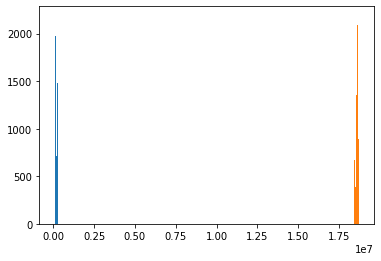

In [26]:
plt.hist(train_df['TransactionDT'])
plt.hist(test_df['TransactionDT'])

In [50]:
train_df['TransactionAmt_log'] = np.log(train_df['TransactionAmt'])

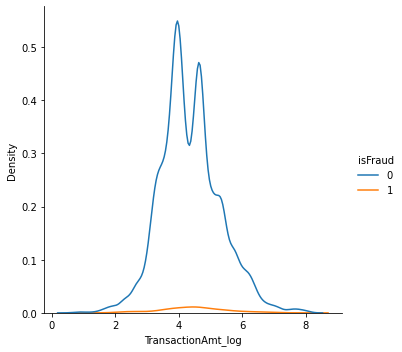

In [51]:
sns.displot(data=train_df, x="TransactionAmt_log", hue="isFraud", 
            kind='kde')

<AxesSubplot:>

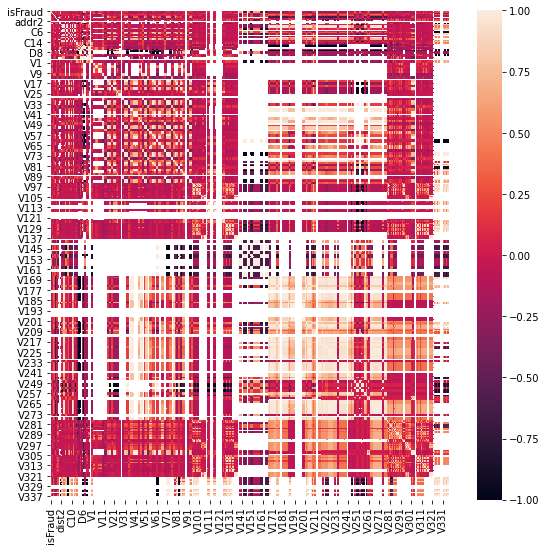

In [8]:
plt.figure(figsize=(9, 9))
sns.heatmap(train_transaction.iloc[:100,1:].corr())

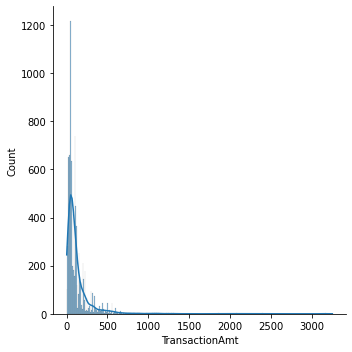

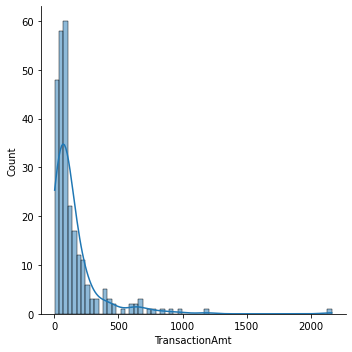

In [9]:
sns.displot(train_transaction[train_transaction['isFraud'] == 0]['TransactionAmt'].iloc[:10000], kde=True)
sns.displot(train_transaction[train_transaction['isFraud'] == 1]['TransactionAmt'].iloc[:10000], kde=True)

# sns.displot(train_transaction['TransactionAmt'])

<AxesSubplot:>

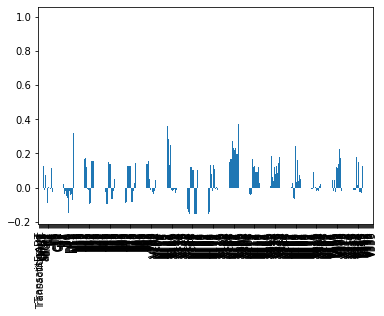

In [45]:
train_transaction.iloc[:1000,1:].corr().iloc[0].dropna().plot(kind='bar')

In [10]:
import missingno as msno

<AxesSubplot:>

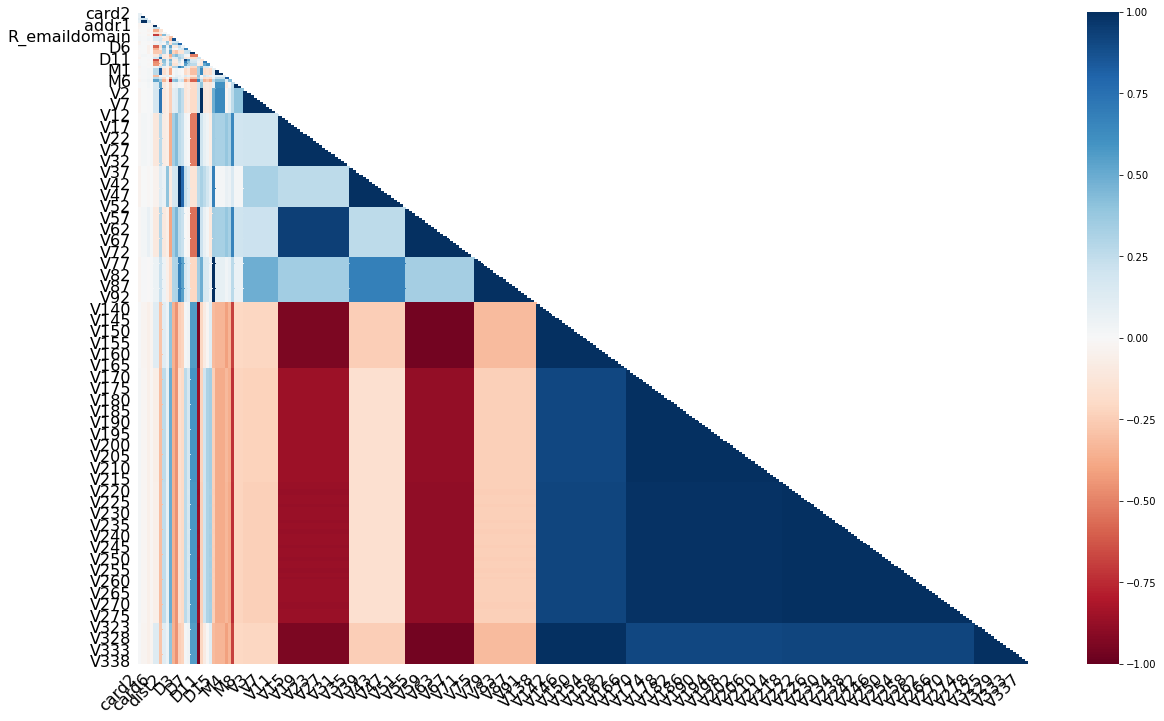

In [33]:
msno.heatmap(train_transaction.iloc[:10000, 2:], labels=False)

## ProductCD

<AxesSubplot:xlabel='ProductCD'>

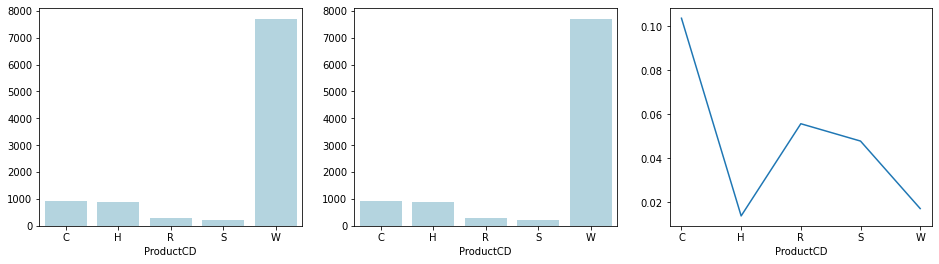

In [52]:
col_count1 = train_transaction.groupby(['ProductCD'])['isFraud'].count()
col_count2 = train_transaction.groupby(['ProductCD'])['isFraud'].count()

col_mean = train_transaction.groupby(['ProductCD'])['isFraud'].mean()

plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
ax = sns.barplot(x=col_count1.index, y=col_count1.values, color='lightblue')
plt.subplot(1, 3, 2)
sns.barplot(x=col_count2.index, y=col_count2.values, color='lightblue')
plt.subplot(1, 3, 3)
sns.lineplot(x=col_mean.index, y=col_mean.values)

## card1/card2/card3/card4/card5/card6

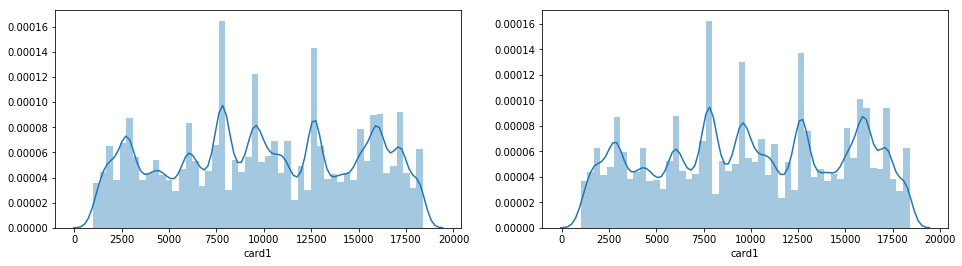

In [59]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.distplot(train_transaction['card1'])
plt.subplot(1, 2, 2)
sns.distplot(test_transaction['card1'])

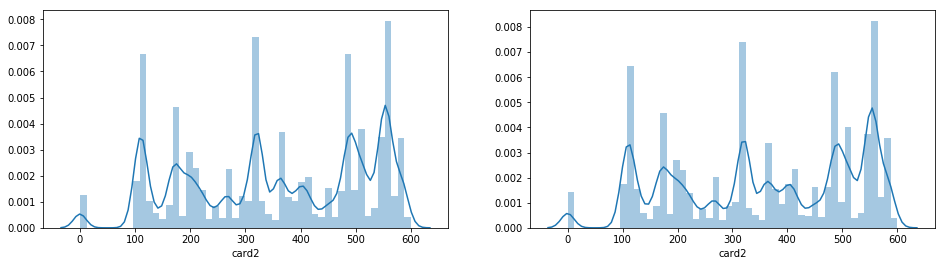

In [61]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.distplot(train_transaction['card2'].fillna(0))
plt.subplot(1, 2, 2)
sns.distplot(test_transaction['card2'].fillna(0))

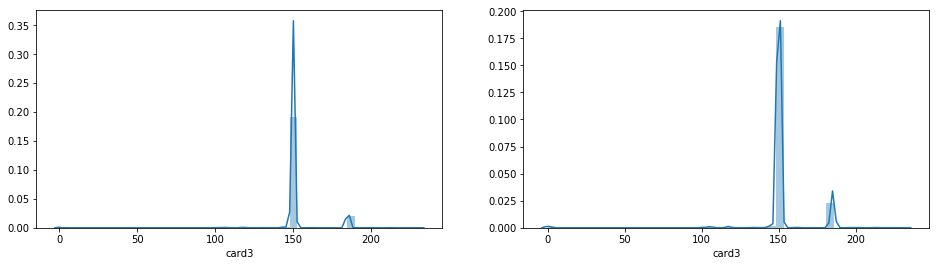

In [63]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.distplot(train_transaction['card3'].fillna(0))
plt.subplot(1, 2, 2)
sns.distplot(test_transaction['card3'].fillna(0))

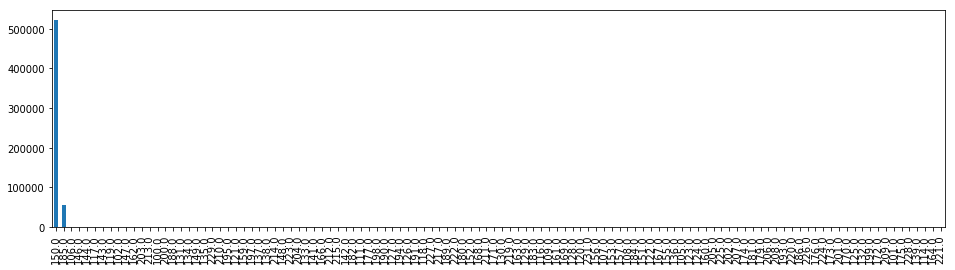

In [67]:
plt.figure(figsize=(16, 4))
train_transaction['card3'].value_counts().plot(kind='bar')

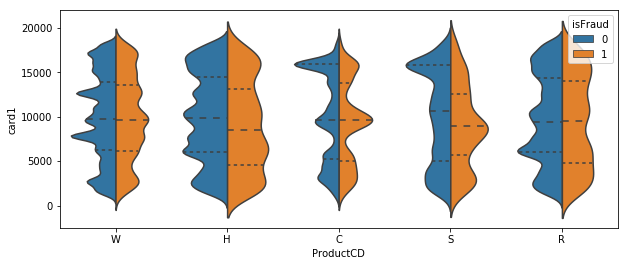

In [69]:
plt.figure(figsize=(10, 4))
sns.violinplot(x="ProductCD", y="card1", hue="isFraud",split=True, inner="quart", data=train_transaction)

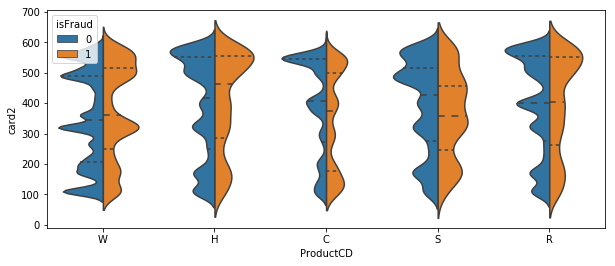

In [70]:
plt.figure(figsize=(10, 4))
sns.violinplot(x="ProductCD", y="card2", hue="isFraud",split=True, inner="quart", data=train_transaction)

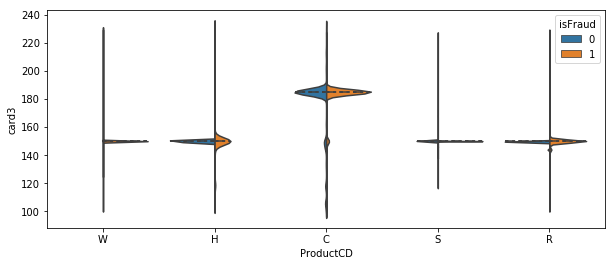

In [71]:
plt.figure(figsize=(10, 4))
sns.violinplot(x="ProductCD", y="card3", hue="isFraud",split=True, inner="quart", data=train_transaction)

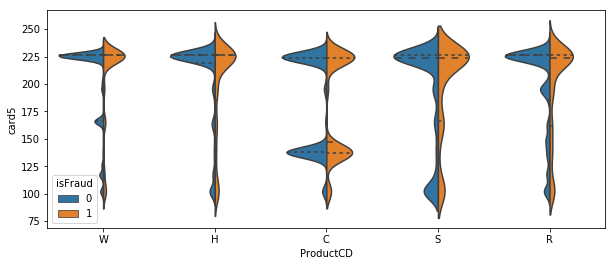

In [74]:
plt.figure(figsize=(10, 4))
sns.violinplot(x="ProductCD", y="card5", hue="isFraud",split=True, inner="quart", data=train_transaction)

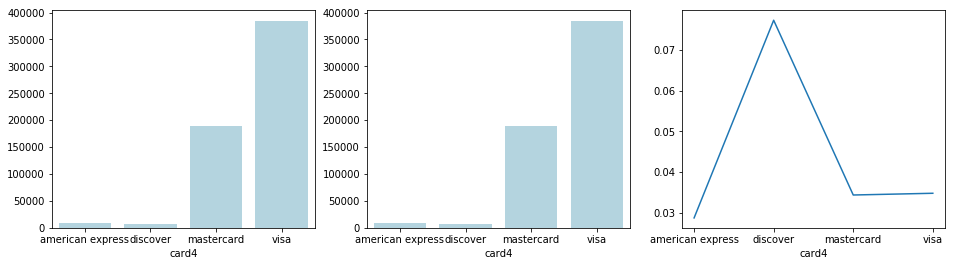

In [72]:
col_count1 = train_transaction.groupby(['card4'])['isFraud'].count()
col_count2 = train_transaction.groupby(['card4'])['isFraud'].count()

col_mean = train_transaction.groupby(['card4'])['isFraud'].mean()

plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.barplot(x=col_count1.index, y=col_count1.values, color='lightblue')
plt.subplot(1, 3, 2)
sns.barplot(x=col_count2.index, y=col_count2.values, color='lightblue')
plt.subplot(1, 3, 3)
sns.lineplot(x=col_mean.index, y=col_mean.values)

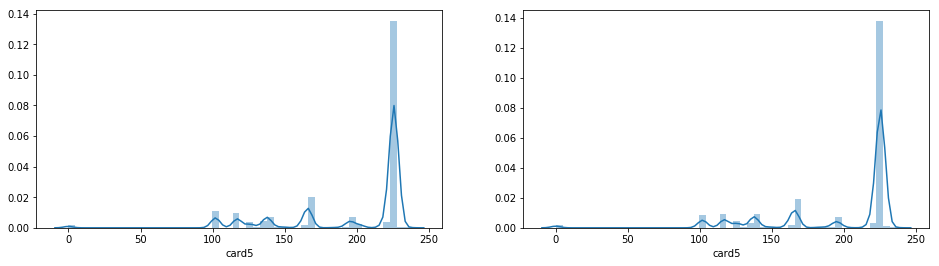

In [73]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.distplot(train_transaction['card5'].fillna(0))
plt.subplot(1, 2, 2)
sns.distplot(test_transaction['card5'].fillna(0))

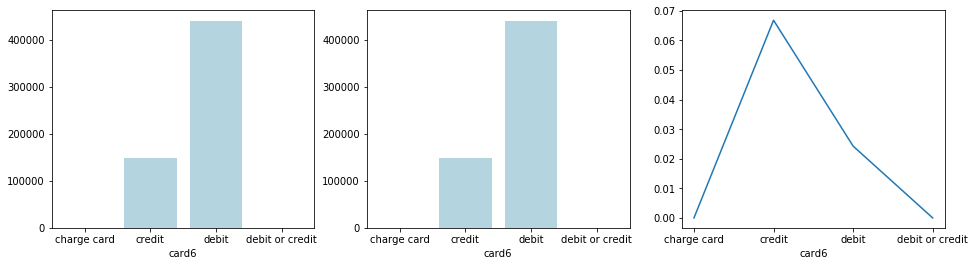

In [75]:
col_count1 = train_transaction.groupby(['card6'])['isFraud'].count()
col_count2 = train_transaction.groupby(['card6'])['isFraud'].count()

col_mean = train_transaction.groupby(['card6'])['isFraud'].mean()

plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.barplot(x=col_count1.index, y=col_count1.values, color='lightblue')
plt.subplot(1, 3, 2)
sns.barplot(x=col_count2.index, y=col_count2.values, color='lightblue')
plt.subplot(1, 3, 3)
sns.lineplot(x=col_mean.index, y=col_mean.values)

## addr1/addr2

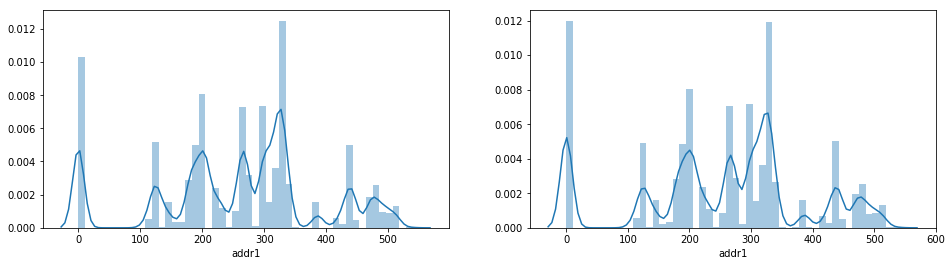

In [77]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.distplot(train_transaction['addr1'].fillna(0))
plt.subplot(1, 2, 2)
sns.distplot(test_transaction['addr1'].fillna(0))

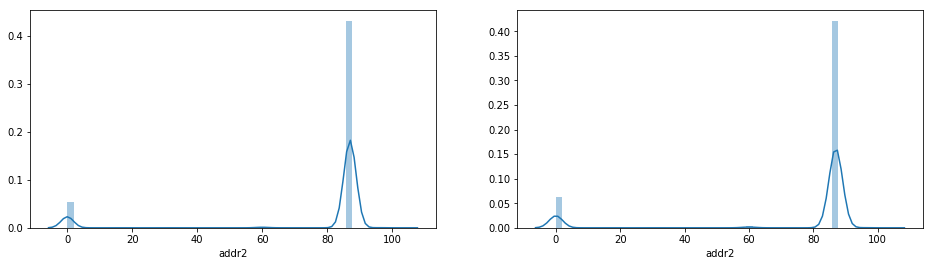

In [78]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.distplot(train_transaction['addr2'].fillna(0))
plt.subplot(1, 2, 2)
sns.distplot(test_transaction['addr2'].fillna(0))

In [85]:
test_transaction['addr2'].value_counts()

87.0     435934
60.0       4041
96.0        608
32.0         61
65.0         49
31.0         36
69.0         27
19.0         23
16.0         22
73.0         21
57.0         19
43.0         18
98.0         15
27.0         14
34.0         11
102.0        10
54.0         10
41.0          8
79.0          8
45.0          7
36.0          7
26.0          7
100.0         5
40.0          5
61.0          5
101.0         5
38.0          5
28.0          4
48.0          4
24.0          4
62.0          4
30.0          4
88.0          4
72.0          4
17.0          4
56.0          4
95.0          4
12.0          4
53.0          3
29.0          3
52.0          3
67.0          3
68.0          3
10.0          3
71.0          3
74.0          2
59.0          2
90.0          2
84.0          2
66.0          2
44.0          2
94.0          2
93.0          2
81.0          2
51.0          1
58.0          1
33.0          1
47.0          1
91.0          1
86.0          1
37.0          1
11.0          1
46.0    

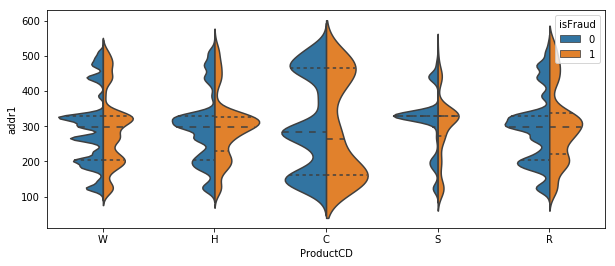

In [79]:
plt.figure(figsize=(10, 4))
sns.violinplot(x="ProductCD", y="addr1", hue="isFraud",split=True, inner="quart", data=train_transaction)

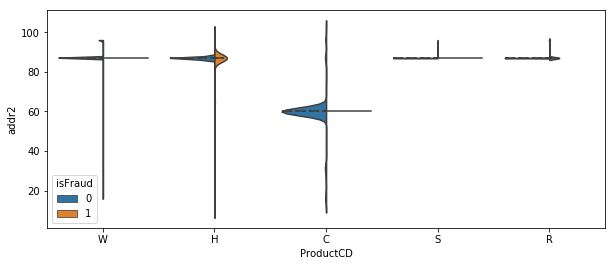

In [80]:
plt.figure(figsize=(10, 4))
sns.violinplot(x="ProductCD", y="addr2", hue="isFraud",split=True, inner="quart", data=train_transaction)

## dist1/dist2

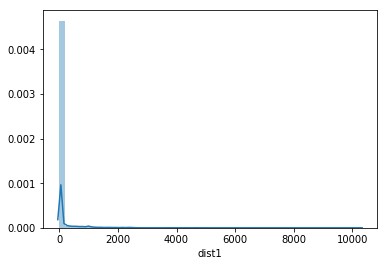

In [10]:
sns.distplot(train_transaction['dist1'].fillna(-1))

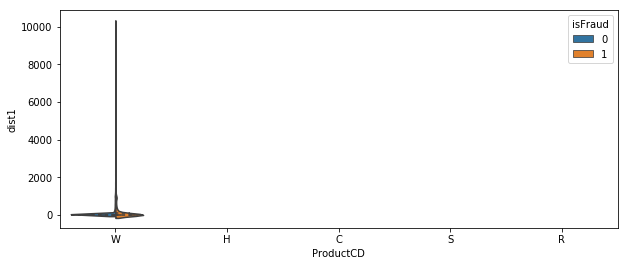

In [81]:
plt.figure(figsize=(10, 4))
sns.violinplot(x="ProductCD", y="dist1", hue="isFraud",split=True, inner="quart", data=train_transaction)

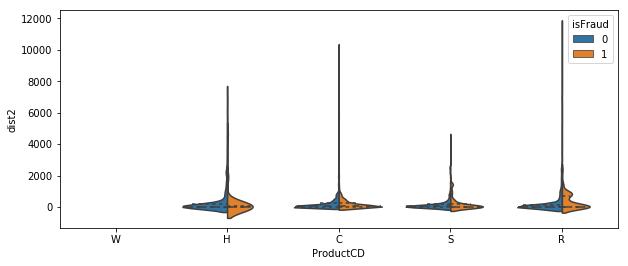

In [83]:
plt.figure(figsize=(10, 4))
sns.violinplot(x="ProductCD", y="dist2", hue="isFraud",split=True, inner="quart", data=train_transaction)

## P_emaildomain/R_emaildomain

In [12]:
train_transaction['P_emaildomain'].value_counts().shape

(59,)

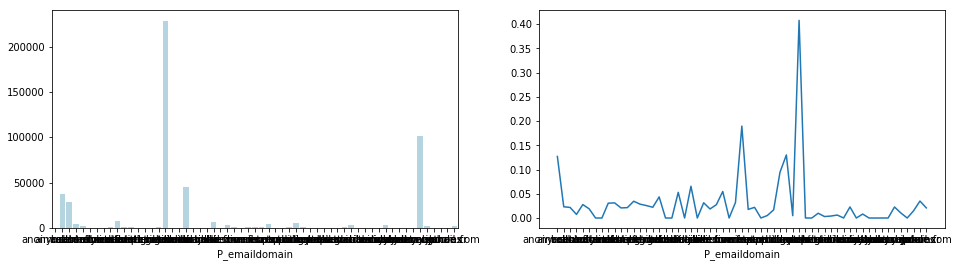

In [17]:
col_count1 = train_transaction.groupby(['P_emaildomain'])['isFraud'].count()
col_mean = train_transaction.groupby(['P_emaildomain'])['isFraud'].mean()

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=col_count1.index, y=col_count1.values, color='lightblue')
plt.subplot(1, 2, 2)
sns.lineplot(x=col_mean.index, y=col_mean.values)

In [21]:
col_mean[col_mean > 0.05]

P_emaildomain
aim.com           0.126984
hotmail.com       0.052950
hotmail.es        0.065574
live.com.mx       0.054740
mail.com          0.189624
outlook.com       0.094584
outlook.es        0.130137
protonmail.com    0.407895
Name: isFraud, dtype: float64

In [18]:
col_count1

P_emaildomain
aim.com                315
anonymous.com        36998
aol.com              28289
att.net               4033
bellsouth.net         1909
cableone.net           159
centurylink.net        205
cfl.rr.com             172
charter.net            816
comcast.net           7888
cox.net               1393
earthlink.net          514
embarqmail.com         260
frontier.com           280
frontiernet.net        195
gmail                  496
gmail.com           228355
gmx.de                 149
hotmail.co.uk          112
hotmail.com          45250
hotmail.de              43
hotmail.es             305
hotmail.fr             295
icloud.com            6267
juno.com               322
live.com              3041
live.com.mx            749
live.fr                 56
mac.com                436
mail.com               559
me.com                1522
msn.com               4092
netzero.com            230
netzero.net            196
optonline.net         1011
outlook.com           5096
outlook.es    

## C1-C15

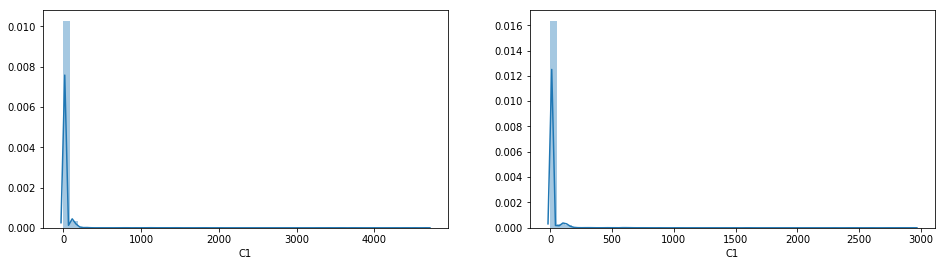

In [22]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.distplot(train_transaction['C1'].fillna(0))
plt.subplot(1, 2, 2)
sns.distplot(test_transaction['C1'].fillna(0))

In [27]:
train_transaction.groupby(['C2'])['isFraud'].mean()

C2
0.0       0.051919
1.0       0.023073
2.0       0.031978
3.0       0.036160
4.0       0.050370
5.0       0.049496
6.0       0.049991
7.0       0.060824
8.0       0.053477
9.0       0.058933
10.0      0.085449
11.0      0.084189
12.0      0.079242
13.0      0.105611
14.0      0.080645
15.0      0.146460
16.0      0.101367
17.0      0.136691
18.0      0.132890
19.0      0.126878
20.0      0.126079
21.0      0.154613
22.0      0.233083
23.0      0.199430
24.0      0.174342
25.0      0.208696
26.0      0.180392
27.0      0.245614
28.0      0.234568
29.0      0.303571
30.0      0.222798
31.0      0.250000
32.0      0.237288
33.0      0.171171
34.0      0.235632
35.0      0.220779
36.0      0.193237
37.0      0.229008
38.0      0.222222
39.0      0.157895
40.0      0.338843
41.0      0.219697
42.0      0.226804
43.0      0.213740
44.0      0.261682
45.0      0.342857
46.0      0.271605
47.0      0.250000
48.0      0.202128
49.0      0.217949
50.0      0.253968
51.0      0.305556
52.0     

In [30]:
train_transaction['C4'].value_counts()

0.0       451883
1.0       111817
2.0        12994
3.0         4949
4.0         1902
5.0          851
6.0          597
7.0          372
9.0          273
10.0         233
8.0          226
12.0         175
11.0         167
16.0         116
15.0         116
17.0         113
13.0         109
14.0          91
20.0          81
18.0          71
52.0          63
21.0          60
19.0          58
30.0          49
83.0          43
24.0          41
70.0          40
51.0          39
23.0          35
39.0          35
91.0          35
22.0          32
92.0          32
88.0          30
35.0          30
47.0          29
37.0          27
34.0          26
25.0          24
55.0          23
31.0          23
87.0          22
58.0          22
28.0          22
41.0          21
29.0          20
84.0          19
75.0          19
46.0          18
57.0          18
54.0          18
49.0          17
33.0          17
56.0          16
881.0         15
48.0          15
82.0          15
50.0          15
36.0          

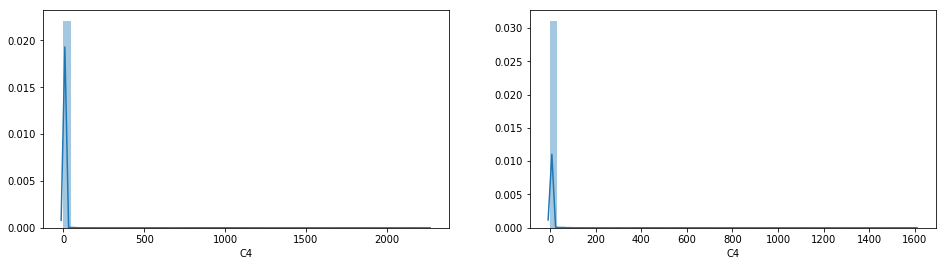

In [31]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.distplot(train_transaction['C4'].fillna(0))
plt.subplot(1, 2, 2)
sns.distplot(test_transaction['C4'].fillna(0))

In [36]:
train_transaction['M3'].value_counts()

T    251731
F     67709
Name: M3, dtype: int64

In [51]:
train_transaction['V258'].isnull().sum()

460110

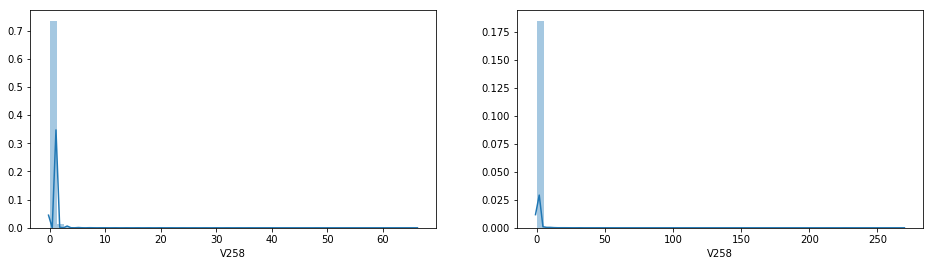

In [53]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.distplot(train_transaction['V258'].fillna(0))
plt.subplot(1, 2, 2)
sns.distplot(test_transaction['V258'].fillna(0))

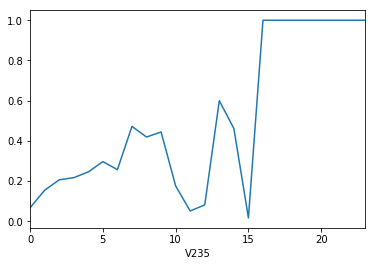

In [64]:
train_transaction.groupby(['V235'])['isFraud'].mean().plot()

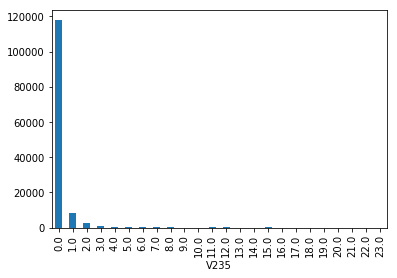

In [65]:
train_transaction.groupby(['V235'])['isFraud'].count().plot(kind='bar')

In [54]:
train_df['addr1']

0       315.0
1       325.0
2       330.0
3       476.0
4       420.0
        ...  
9995    330.0
9996    387.0
9997    330.0
9998    204.0
9999    441.0
Name: addr1, Length: 10000, dtype: float64

In [66]:
mail = train_df['P_emaildomain'].value_counts()[train_df['P_emaildomain'].value_counts() > 100]

<AxesSubplot:>

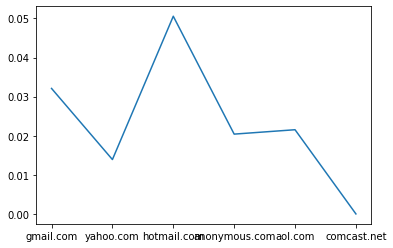

In [67]:
train_df.groupby('P_emaildomain')['isFraud'].mean()[mail.index].plot()